<a href="https://colab.research.google.com/github/Deri-Nugroho/contoh-soal-pemrograman-on-site-Ekshibisi-AI/blob/main/Contoh_Soal_Pemrograman_2_Eksebisi_AI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Umumnya, gambar digital direpresentasikan sebagai list 2D, di mana setiap koordinatnya merupakan intensitas warna. Untuk gambar hitam-putih atau grayscale, nilainya adalah bilangan bulat dari 0 (hitam) sampai 255 (putih).

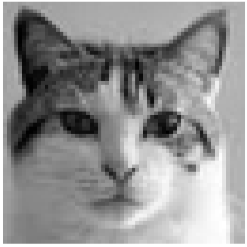

Andaikan diberikan sebuah citra/gambar (misalnya gambar kucing di atas) dengan representasi grayscale. Tugas Anda adalah: buatlah kode untuk melakukan proses *blur* pada citra/gambar. Proses *blur* pada sebuah citra/gambar dilakukan sebagai berikut: untuk setiap nilai piksel $img[i][j]$ pada citra tersebut, kita menghitung sebuah nilai baru $blur\_img[i][j]$ yang didapatkan dengan cara menghitung rata-rata dari 9 nilai piksel di sekitarnya (pada sebuah *grid* berukuran $3\times 3$), termasuk piksel itu sendiri (dibulatkan ke bawah). Lebih tepatnya,

$blur\_img[i][j] = \frac{1}{9} \sum_{x=i-1}^{i+1}\sum_{y=i-1}^{i+1} img[x][y]$

Dalam menghitung rata-rata tersebut pada tepian atau pojok citra, apabila diperlukan untuk mengambil nilai *di luar* citra aslinya (misalnya untuk $x<0$ atau $x>$ukuran baris citra), maka asumsikan bahwa nilai $img[x][y] = 0$ (alias piksel di luar citra dianggap hitam).

Setelah mendapatkan citra *blur* yang diinginkan, ubahlah citra tersebut menjadi **satu** buah nilai, dengan cara menjumlahkan semua nilai piksel pada citra hasil *blur* tersebut. Kode di bawah ini akan membantu Anda memulai mengerjakan, Anda tinggal melengkapi bagian implementasi proses *blur* tersebut.

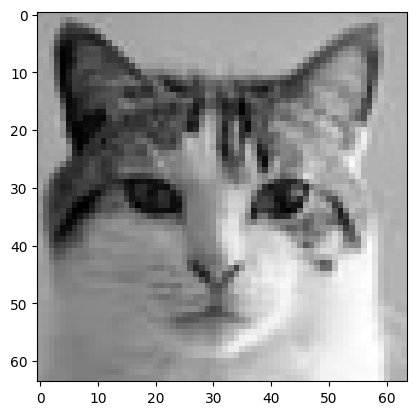

In [ ]:
import matplotlib.pyplot as plt
# gambar kucing 64 x 64
img = [[155, 163, 158, 160, 153, 157, 163, 161, 159, 160, 156, 157, 161, 160, 161, 161, 163, 164, 162, 164, 165, 165, 167, 167, 166, 167, 169, 170, 170, 169, 169, 168, 168, 168, 168, 169, 167, 168, 169, 169, 169, 170, 170, 171, 170, 171, 174, 173, 174, 175, 174, 172, 173, 175, 174, 170, 166, 165, 171, 173, 172, 176, 173, 171], [162, 160, 158, 161, 140, 119, 133, 149, 160, 161, 154, 159, 167, 162, 161, 163, 161, 164, 164, 165, 167, 166, 168, 168, 167, 169, 169, 169, 168, 169, 169, 168, 169, 168, 167, 169, 168, 170, 169, 169, 171, 171, 171, 171, 172, 173, 172, 173, 177, 177, 177, 175, 171, 176, 180, 176, 173, 170, 158, 166, 168, 167, 171, 172], [165, 153, 159, 162, 109, 69, 74, 92, 116, 143, 171, 169, 156, 162, 163, 164, 163, 164, 164, 166, 167, 166, 168, 168, 168, 170, 170, 170, 170, 170, 170, 170, 171, 170, 169, 170, 169, 169, 171, 171, 172, 173, 173, 173, 174, 174, 174, 174, 176, 179, 177, 176, 179, 177, 163, 148, 138, 116, 123, 157, 174, 173, 171, 172], [161, 157, 166, 136, 70, 52, 56, 57, 60, 84, 132, 165, 165, 162, 164, 163, 164, 165, 166, 167, 168, 167, 169, 169, 169, 169, 170, 171, 170, 170, 170, 171, 170, 171, 171, 171, 171, 171, 172, 172, 173, 173, 174, 174, 175, 174, 176, 178, 178, 177, 180, 181, 167, 143, 122, 113, 109, 99, 115, 160, 180, 176, 171, 172], [161, 162, 163, 102, 46, 36, 37, 40, 34, 30, 48, 111, 163, 165, 162, 164, 163, 164, 164, 167, 168, 168, 170, 170, 169, 171, 171, 170, 169, 171, 171, 172, 171, 172, 172, 171, 172, 171, 173, 173, 174, 174, 175, 175, 175, 175, 176, 177, 178, 182, 172, 148, 125, 99, 90, 97, 105, 111, 132, 165, 174, 170, 171, 173], [162, 163, 153, 77, 24, 15, 35, 53, 54, 46, 34, 39, 85, 159, 173, 159, 170, 163, 166, 167, 167, 167, 168, 167, 167, 172, 172, 172, 175, 175, 170, 169, 170, 170, 171, 172, 175, 177, 172, 173, 176, 176, 176, 174, 175, 181, 179, 181, 187, 171, 137, 105, 84, 87, 98, 101, 100, 99, 118, 158, 179, 172, 171, 173], [163, 166, 143, 58, 7, 11, 35, 62, 74, 81, 78, 57, 55, 82, 147, 173, 162, 167, 163, 164, 168, 168, 171, 167, 165, 166, 169, 168, 172, 175, 171, 168, 172, 172, 174, 174, 179, 177, 173, 176, 177, 178, 177, 176, 173, 179, 182, 185, 173, 126, 85, 81, 98, 122, 136, 119, 99, 90, 99, 146, 182, 171, 175, 175], [169, 169, 140, 51, 2, 13, 43, 67, 70, 73, 75, 62, 54, 55, 100, 158, 166, 169, 163, 164, 167, 168, 173, 173, 173, 173, 167, 169, 169, 170, 172, 173, 170, 172, 177, 172, 170, 165, 176, 176, 175, 177, 178, 180, 179, 180, 175, 153, 113, 81, 80, 105, 133, 143, 149, 138, 104, 73, 74, 136, 180, 171, 175, 174], [160, 167, 149, 60, 1, 9, 30, 65, 79, 82, 82, 64, 54, 56, 52, 73, 143, 169, 165, 164, 165, 161, 163, 166, 167, 174, 171, 171, 174, 169, 167, 174, 172, 168, 173, 172, 170, 167, 172, 171, 174, 177, 180, 181, 187, 180, 140, 91, 67, 76, 100, 133, 153, 161, 169, 157, 121, 65, 62, 141, 179, 170, 176, 175], [161, 164, 152, 67, 0, 16, 44, 78, 84, 80, 81, 69, 71, 68, 61, 55, 72, 139, 157, 153, 154, 151, 160, 158, 158, 164, 161, 161, 172, 170, 171, 180, 172, 160, 170, 174, 172, 174, 171, 172, 177, 177, 177, 178, 173, 128, 82, 68, 80, 107, 134, 151, 159, 162, 160, 153, 142, 73, 66, 151, 180, 173, 173, 173], [166, 161, 153, 73, 1, 27, 60, 71, 58, 58, 70, 70, 73, 73, 79, 68, 45, 63, 123, 124, 124, 120, 131, 137, 147, 157, 134, 133, 148, 159, 165, 179, 166, 154, 168, 165, 162, 160, 167, 172, 174, 170, 161, 155, 116, 72, 57, 83, 112, 134, 145, 151, 163, 167, 158, 147, 137, 77, 75, 160, 178, 176, 175, 174], [165, 161, 158, 82, 4, 32, 61, 59, 57, 80, 91, 79, 77, 81, 96, 112, 89, 54, 73, 103, 93, 71, 66, 91, 104, 127, 110, 87, 109, 130, 139, 144, 134, 125, 129, 134, 125, 116, 123, 129, 124, 118, 100, 85, 55, 56, 76, 97, 120, 136, 147, 158, 167, 176, 175, 159, 130, 75, 84, 169, 178, 176, 173, 173], [161, 164, 164, 95, 8, 26, 58, 56, 66, 81, 82, 88, 101, 114, 106, 103, 111, 98, 69, 77, 109, 83, 31, 44, 63, 81, 89, 61, 88, 107, 106, 98, 113, 99, 68, 85, 92, 74, 76, 67, 61, 72, 58, 47, 54, 67, 96, 121, 128, 131, 137, 143, 149, 155, 166, 169, 130, 67, 106, 187, 180, 176, 176, 175], [164, 163, 165, 116, 16, 18, 56, 55, 52, 58, 63, 69, 76, 85, 81, 56, 56, 66, 45, 42, 85, 109, 67, 23, 22, 38, 56, 60, 73, 100, 97, 76, 97, 97, 67, 54, 59, 40, 33, 22, 55, 92, 65, 61, 69, 71, 95, 130, 154, 154, 145, 151, 137, 136, 159, 162, 135, 43, 127, 191, 174, 174, 172, 174], [168, 162, 165, 141, 35, 11, 41, 43, 47, 62, 74, 80, 83, 86, 78, 45, 41, 60, 57, 55, 74, 96, 101, 100, 66, 55, 65, 61, 70, 119, 106, 62, 75, 109, 83, 59, 90, 67, 48, 57, 78, 90, 69, 67, 70, 85, 102, 117, 146, 169, 176, 166, 133, 133, 140, 137, 120, 55, 143, 189, 180, 173, 175, 176], [167, 163, 165, 159, 61, 7, 20, 32, 48, 67, 71, 71, 77, 86, 114, 104, 83, 78, 96, 103, 80, 92, 93, 83, 89, 105, 104, 46, 46, 98, 83, 56, 43, 64, 55, 23, 79, 100, 91, 82, 60, 79, 97, 87, 105, 121, 117, 127, 149, 162, 169, 161, 162, 146, 134, 143, 77, 62, 161, 189, 181, 179, 179, 177], [165, 164, 164, 166, 92, 9, 16, 37, 50, 63, 56, 56, 81, 79, 108, 125, 115, 90, 86, 86, 63, 69, 64, 42, 68, 79, 66, 24, 51, 91, 85, 62, 28, 41, 47, 2, 42, 76, 89, 78, 73, 110, 127, 123, 147, 137, 111, 132, 150, 153, 173, 164, 169, 167, 141, 140, 83, 75, 181, 183, 173, 186, 179, 176], [163, 166, 159, 166, 118, 14, 17, 35, 33, 36, 18, 22, 82, 90, 80, 80, 82, 63, 59, 58, 43, 54, 54, 48, 65, 81, 45, 19, 81, 126, 125, 80, 40, 50, 42, 4, 40, 64, 80, 83, 88, 107, 114, 111, 135, 142, 151, 155, 125, 127, 168, 177, 176, 165, 133, 110, 75, 123, 193, 181, 178, 178, 176, 176], [162, 163, 166, 176, 119, 10, 19, 31, 9, 11, 12, 8, 54, 84, 68, 39, 54, 48, 54, 72, 57, 76, 60, 74, 83, 84, 43, 46, 111, 163, 141, 103, 57, 55, 85, 35, 36, 85, 90, 75, 98, 122, 101, 102, 119, 149, 165, 161, 149, 169, 154, 126, 150, 154, 123, 96, 80, 172, 185, 173, 181, 178, 176, 178], [159, 168, 162, 178, 144, 22, 7, 9, 11, 14, 10, 31, 48, 59, 55, 45, 52, 51, 53, 68, 92, 55, 74, 97, 86, 72, 23, 32, 126, 174, 157, 106, 39, 87, 141, 48, 9, 78, 100, 71, 125, 153, 152, 137, 128, 132, 119, 138, 169, 195, 180, 150, 128, 134, 152, 154, 138, 185, 181, 173, 178, 181, 175, 178], [160, 165, 161, 170, 143, 33, 3, 3, 16, 13, 22, 51, 53, 54, 56, 60, 55, 62, 64, 63, 69, 64, 71, 77, 87, 74, 27, 48, 150, 185, 160, 99, 28, 94, 154, 46, 12, 78, 89, 81, 136, 139, 154, 158, 155, 150, 136, 135, 154, 172, 193, 203, 155, 128, 163, 197, 214, 195, 177, 179, 178, 182, 178, 179], [158, 163, 164, 168, 141, 58, 4, 3, 8, 21, 47, 48, 48, 44, 68, 77, 72, 86, 76, 50, 54, 73, 78, 67, 85, 134, 128, 122, 168, 192, 170, 95, 40, 92, 137, 46, 66, 94, 85, 87, 96, 108, 139, 170, 174, 168, 143, 139, 147, 162, 170, 193, 184, 138, 145, 191, 238, 201, 173, 183, 177, 181, 178, 178], [158, 168, 160, 167, 170, 101, 20, 1, 9, 43, 54, 17, 55, 72, 75, 69, 73, 101, 109, 91, 56, 62, 73, 55, 92, 154, 185, 168, 168, 198, 174, 88, 47, 101, 142, 62, 130, 111, 66, 84, 84, 117, 136, 146, 153, 159, 155, 158, 164, 178, 169, 173, 158, 128, 150, 205, 238, 193, 172, 183, 178, 180, 178, 177], [160, 166, 166, 165, 169, 135, 30, 2, 41, 46, 49, 39, 54, 51, 68, 90, 90, 79, 77, 116, 97, 78, 76, 74, 107, 150, 184, 179, 164, 192, 161, 77, 27, 86, 142, 86, 173, 126, 32, 63, 103, 124, 132, 130, 133, 161, 177, 175, 163, 177, 184, 186, 158, 142, 172, 220, 228, 181, 174, 180, 177, 177, 178, 176], [163, 161, 165, 164, 163, 133, 38, 21, 48, 41, 52, 69, 68, 58, 61, 84, 83, 71, 68, 111, 144, 111, 117, 129, 131, 152, 168, 173, 166, 189, 178, 105, 26, 72, 116, 91, 187, 142, 25, 36, 87, 109, 130, 133, 124, 137, 184, 174, 165, 171, 185, 181, 193, 194, 204, 230, 202, 177, 175, 180, 177, 175, 178, 176], [164, 162, 161, 162, 160, 103, 50, 46, 54, 64, 66, 57, 59, 73, 77, 93, 94, 94, 89, 97, 126, 136, 129, 140, 129, 142, 158, 173, 167, 176, 176, 122, 52, 69, 84, 86, 181, 157, 47, 11, 98, 149, 133, 127, 120, 129, 178, 184, 180, 168, 163, 161, 187, 222, 241, 226, 183, 176, 178, 177, 176, 176, 178, 176], [163, 164, 166, 152, 118, 65, 50, 49, 57, 76, 65, 46, 55, 73, 90, 95, 90, 95, 88, 95, 125, 161, 129, 125, 129, 141, 151, 167, 170, 177, 172, 135, 82, 75, 81, 108, 170, 172, 73, 12, 122, 173, 125, 115, 116, 140, 183, 204, 191, 186, 158, 163, 179, 208, 247, 218, 183, 179, 178, 177, 179, 176, 176, 176], [155, 161, 158, 114, 59, 49, 44, 45, 69, 81, 62, 51, 58, 74, 106, 120, 113, 113, 104, 109, 116, 129, 138, 127, 131, 141, 146, 162, 172, 177, 168, 142, 108, 90, 103, 133, 156, 175, 96, 57, 138, 159, 119, 133, 143, 158, 186, 195, 188, 177, 158, 175, 181, 183, 228, 223, 176, 177, 177, 177, 177, 174, 176, 175], [157, 157, 119, 69, 42, 48, 48, 51, 70, 77, 67, 54, 46, 62, 79, 81, 65, 61, 63, 70, 98, 105, 127, 114, 122, 134, 137, 151, 165, 169, 164, 149, 127, 107, 104, 128, 141, 173, 145, 128, 155, 136, 98, 108, 124, 162, 221, 208, 175, 167, 173, 169, 166, 171, 194, 218, 179, 177, 177, 175, 176, 177, 175, 173], [162, 144, 87, 48, 40, 41, 61, 64, 63, 67, 65, 56, 47, 42, 38, 18, 7, 15, 21, 14, 19, 31, 76, 114, 108, 119, 122, 130, 150, 154, 150, 151, 144, 132, 110, 136, 148, 169, 155, 132, 97, 55, 40, 32, 36, 70, 135, 184, 182, 162, 165, 168, 166, 168, 152, 186, 202, 175, 177, 177, 173, 175, 175, 173], [165, 128, 77, 48, 31, 36, 53, 62, 65, 54, 42, 39, 53, 63, 55, 25, 15, 41, 45, 24, 15, 18, 13, 64, 92, 104, 111, 120, 135, 143, 144, 156, 163, 172, 153, 171, 172, 161, 122, 46, 22, 30, 33, 38, 76, 75, 36, 122, 144, 148, 164, 178, 180, 185, 168, 175, 195, 178, 174, 178, 178, 176, 176, 174], [155, 111, 69, 51, 40, 44, 52, 62, 50, 18, 14, 44, 68, 81, 85, 40, 18, 43, 38, 12, 18, 48, 39, 23, 59, 92, 110, 121, 130, 141, 148, 161, 178, 196, 196, 191, 179, 130, 60, 44, 43, 27, 26, 53, 105, 126, 56, 173, 136, 113, 118, 146, 168, 180, 178, 167, 178, 184, 169, 172, 182, 180, 176, 174], [144, 97, 64, 48, 47, 57, 45, 26, 7, 9, 44, 75, 85, 91, 97, 60, 20, 27, 36, 22, 26, 49, 43, 13, 25, 83, 116, 123, 130, 137, 146, 160, 182, 202, 205, 199, 174, 99, 60, 67, 54, 15, 15, 42, 71, 41, 101, 184, 162, 139, 86, 78, 139, 170, 177, 173, 183, 188, 171, 168, 175, 174, 174, 174], [151, 94, 59, 43, 50, 53, 19, 1, 1, 24, 61, 82, 84, 73, 86, 104, 40, 2, 20, 18, 22, 38, 41, 15, 14, 82, 121, 124, 129, 135, 142, 164, 187, 209, 208, 205, 166, 56, 69, 70, 65, 29, 9, 29, 22, 22, 158, 177, 160, 176, 142, 59, 79, 165, 182, 187, 179, 188, 175, 170, 175, 176, 175, 174], [151, 96, 58, 50, 59, 31, 1, 1, 8, 33, 66, 84, 85, 91, 101, 111, 92, 56, 21, 14, 13, 14, 13, 10, 25, 85, 123, 126, 127, 134, 144, 162, 175, 207, 206, 201, 152, 21, 62, 54, 38, 24, 9, 0, 18, 95, 176, 154, 146, 144, 157, 89, 27, 123, 188, 170, 164, 180, 178, 169, 178, 175, 172, 174], [141, 96, 65, 63, 53, 15, 4, 21, 44, 73, 103, 110, 104, 119, 126, 125, 124, 114, 97, 70, 55, 62, 78, 79, 63, 86, 123, 125, 125, 134, 147, 173, 184, 218, 216, 187, 128, 41, 107, 113, 66, 34, 39, 47, 104, 156, 126, 113, 134, 128, 123, 102, 31, 63, 162, 158, 164, 191, 193, 177, 184, 175, 173, 176], [150, 97, 68, 63, 32, 5, 17, 48, 83, 107, 125, 134, 135, 142, 143, 147, 135, 121, 126, 128, 117, 118, 118, 108, 87, 89, 123, 121, 126, 136, 144, 187, 208, 227, 225, 183, 141, 123, 153, 155, 133, 125, 126, 123, 125, 116, 88, 102, 136, 132, 107, 97, 60, 41, 120, 179, 170, 205, 204, 181, 178, 170, 170, 175], [149, 103, 71, 47, 10, 15, 45, 71, 99, 117, 126, 134, 141, 146, 142, 143, 141, 141, 143, 140, 143, 141, 130, 127, 130, 113, 118, 125, 127, 132, 144, 180, 215, 223, 223, 188, 176, 188, 186, 176, 163, 147, 119, 93, 96, 112, 88, 112, 135, 145, 146, 157, 128, 59, 86, 175, 180, 211, 208, 185, 176, 172, 175, 176], [155, 120, 67, 29, 14, 40, 58, 75, 106, 126, 132, 130, 129, 130, 136, 144, 148, 149, 148, 148, 158, 161, 155, 146, 143, 125, 119, 127, 133, 132, 143, 182, 223, 228, 230, 204, 191, 200, 199, 197, 200, 202, 181, 147, 124, 138, 112, 116, 114, 136, 175, 209, 180, 94, 86, 159, 209, 222, 214, 188, 175, 174, 181, 177], [162, 130, 70, 35, 38, 62, 69, 82, 111, 134, 140, 135, 132, 131, 131, 132, 136, 141, 144, 144, 154, 161, 160, 149, 142, 132, 115, 122, 129, 130, 135, 180, 217, 229, 235, 219, 203, 201, 199, 199, 207, 219, 212, 191, 155, 149, 128, 139, 139, 165, 196, 218, 192, 119, 91, 125, 207, 240, 223, 189, 174, 174, 183, 179], [165, 135, 83, 59, 65, 77, 89, 102, 122, 138, 144, 142, 140, 141, 142, 141, 140, 138, 136, 143, 148, 152, 154, 151, 146, 133, 118, 115, 120, 130, 132, 163, 203, 225, 235, 223, 204, 200, 198, 202, 205, 212, 219, 216, 192, 143, 90, 117, 164, 194, 206, 218, 187, 148, 136, 135, 207, 251, 227, 188, 175, 175, 182, 179], [161, 147, 105, 76, 81, 102, 116, 117, 122, 129, 132, 130, 133, 142, 141, 139, 139, 138, 138, 143, 141, 141, 147, 150, 150, 136, 119, 107, 112, 126, 130, 149, 189, 221, 233, 222, 204, 200, 210, 209, 205, 214, 225, 213, 209, 198, 169, 165, 190, 215, 218, 211, 190, 183, 192, 184, 225, 253, 228, 190, 177, 176, 179, 179], [161, 151, 114, 91, 98, 112, 118, 116, 117, 126, 134, 132, 131, 134, 132, 131, 131, 133, 135, 136, 132, 132, 140, 145, 146, 130, 105, 94, 99, 110, 111, 131, 167, 214, 230, 216, 195, 192, 213, 223, 219, 219, 228, 224, 208, 187, 167, 160, 171, 172, 181, 202, 214, 221, 231, 238, 245, 248, 224, 188, 178, 178, 177, 179], [158, 152, 125, 109, 116, 120, 123, 125, 131, 137, 140, 140, 137, 134, 133, 132, 132, 133, 135, 137, 132, 130, 138, 146, 149, 131, 78, 58, 97, 104, 105, 124, 157, 212, 172, 168, 192, 187, 213, 228, 227, 223, 229, 233, 234, 213, 191, 159, 129, 87, 105, 186, 235, 238, 244, 245, 243, 249, 226, 187, 177, 179, 177, 178], [155, 152, 136, 119, 120, 125, 129, 130, 131, 133, 135, 137, 137, 133, 131, 129, 128, 128, 128, 122, 114, 116, 127, 127, 141, 136, 85, 38, 60, 96, 120, 130, 149, 130, 68, 149, 203, 201, 214, 232, 236, 230, 235, 243, 235, 219, 210, 192, 159, 107, 109, 190, 242, 238, 248, 248, 245, 251, 229, 187, 175, 180, 177, 178], [156, 153, 136, 121, 122, 126, 131, 131, 126, 124, 125, 127, 128, 124, 122, 121, 121, 123, 125, 134, 134, 138, 138, 122, 128, 133, 131, 85, 30, 46, 110, 140, 92, 78, 141, 198, 212, 214, 211, 230, 235, 228, 232, 241, 235, 214, 202, 198, 194, 183, 189, 225, 248, 239, 244, 247, 249, 252, 229, 186, 174, 180, 177, 179], [158, 157, 140, 125, 126, 127, 131, 134, 132, 133, 133, 134, 132, 127, 122, 118, 118, 124, 129, 132, 136, 132, 136, 140, 140, 143, 140, 132, 86, 49, 90, 115, 80, 121, 193, 201, 202, 229, 223, 237, 241, 238, 242, 246, 236, 216, 209, 209, 211, 210, 221, 238, 245, 243, 246, 248, 252, 252, 229, 187, 175, 180, 177, 178], [157, 159, 144, 129, 128, 130, 126, 129, 135, 140, 142, 141, 142, 142, 139, 136, 134, 134, 135, 123, 111, 109, 116, 110, 109, 136, 130, 142, 143, 101, 78, 72, 98, 155, 184, 195, 198, 215, 219, 223, 229, 239, 247, 244, 228, 213, 213, 214, 214, 211, 222, 229, 237, 243, 246, 249, 253, 251, 228, 188, 176, 180, 177, 178], [160, 161, 149, 133, 129, 128, 127, 129, 130, 130, 130, 130, 132, 135, 134, 134, 135, 136, 138, 137, 130, 137, 140, 125, 129, 143, 148, 149, 146, 124, 86, 85, 117, 157, 193, 192, 211, 222, 209, 218, 223, 233, 242, 243, 222, 208, 210, 211, 214, 218, 227, 233, 240, 244, 242, 246, 248, 253, 228, 188, 173, 179, 177, 178], [159, 159, 150, 138, 132, 130, 133, 134, 133, 132, 133, 135, 137, 137, 132, 128, 129, 133, 135, 126, 121, 111, 110, 118, 125, 132, 134, 121, 117, 120, 101, 96, 126, 138, 155, 184, 193, 210, 210, 223, 227, 233, 242, 243, 232, 219, 213, 207, 212, 218, 227, 229, 237, 241, 243, 249, 250, 248, 227, 189, 175, 178, 178, 180], [155, 153, 148, 142, 138, 134, 135, 135, 135, 136, 136, 137, 136, 134, 133, 133, 133, 134, 135, 140, 136, 129, 125, 124, 121, 125, 117, 116, 127, 122, 98, 95, 121, 139, 159, 175, 188, 204, 205, 214, 217, 230, 246, 240, 226, 218, 214, 210, 213, 215, 223, 230, 233, 237, 243, 247, 249, 244, 228, 197, 182, 182, 174, 178], [156, 154, 149, 143, 138, 134, 134, 134, 135, 135, 137, 137, 137, 139, 139, 138, 134, 129, 126, 138, 140, 136, 129, 128, 132, 137, 137, 135, 117, 84, 63, 73, 113, 140, 163, 184, 198, 206, 213, 218, 224, 234, 239, 234, 222, 216, 210, 208, 211, 218, 224, 231, 234, 239, 244, 248, 251, 248, 233, 211, 199, 190, 173, 173], [155, 152, 147, 141, 136, 133, 134, 134, 135, 135, 135, 136, 136, 134, 133, 133, 133, 135, 136, 133, 138, 141, 133, 121, 115, 101, 92, 87, 80, 70, 72, 78, 88, 105, 134, 167, 187, 196, 202, 211, 229, 240, 237, 232, 218, 209, 206, 206, 210, 217, 226, 231, 234, 239, 244, 248, 252, 251, 232, 208, 196, 193, 188, 180], [155, 152, 147, 141, 136, 133, 133, 134, 134, 134, 134, 135, 133, 129, 130, 132, 136, 141, 143, 131, 129, 128, 121, 104, 87, 84, 84, 90, 99, 101, 105, 111, 120, 118, 125, 139, 163, 193, 214, 229, 242, 241, 230, 217, 208, 204, 202, 203, 209, 218, 225, 232, 235, 240, 245, 249, 251, 248, 237, 209, 186, 184, 190, 190], [154, 151, 147, 141, 136, 132, 132, 134, 134, 134, 135, 136, 133, 130, 134, 137, 139, 138, 139, 148, 142, 136, 129, 118, 106, 106, 110, 117, 117, 112, 116, 128, 149, 162, 170, 173, 185, 210, 228, 240, 239, 230, 221, 211, 202, 201, 197, 199, 210, 219, 226, 232, 235, 240, 245, 249, 251, 252, 245, 216, 185, 177, 176, 188], [155, 152, 146, 140, 135, 132, 131, 132, 133, 133, 134, 134, 133, 132, 133, 135, 137, 140, 141, 144, 148, 147, 141, 136, 130, 126, 124, 128, 132, 128, 127, 140, 163, 174, 192, 215, 229, 235, 234, 238, 221, 206, 208, 204, 198, 195, 194, 199, 208, 217, 227, 234, 237, 242, 246, 250, 253, 254, 242, 216, 192, 181, 176, 183], [151, 147, 140, 133, 129, 128, 126, 125, 127, 131, 134, 136, 136, 135, 136, 137, 140, 143, 145, 145, 151, 153, 150, 150, 147, 140, 139, 147, 150, 145, 141, 157, 182, 188, 212, 239, 244, 241, 226, 216, 201, 193, 195, 200, 193, 187, 192, 204, 210, 218, 230, 235, 238, 243, 247, 251, 253, 252, 241, 226, 209, 194, 185, 181], [152, 146, 139, 131, 128, 128, 125, 124, 127, 130, 133, 135, 135, 133, 136, 139, 143, 146, 148, 146, 142, 144, 150, 155, 158, 152, 154, 159, 159, 154, 152, 167, 197, 221, 238, 239, 226, 218, 204, 199, 193, 193, 198, 205, 203, 195, 196, 209, 220, 223, 229, 237, 239, 243, 248, 251, 252, 252, 249, 234, 208, 197, 189, 187], [153, 147, 139, 132, 129, 128, 126, 125, 128, 130, 132, 133, 132, 129, 131, 133, 136, 138, 139, 137, 133, 141, 150, 151, 157, 162, 167, 174, 176, 174, 174, 193, 217, 235, 236, 209, 198, 188, 186, 188, 191, 196, 203, 207, 216, 210, 208, 220, 228, 230, 234, 239, 241, 244, 247, 249, 250, 253, 254, 239, 205, 194, 191, 180], [151, 146, 139, 132, 129, 128, 126, 125, 126, 128, 129, 130, 130, 128, 128, 128, 128, 129, 128, 127, 137, 139, 136, 141, 149, 162, 167, 174, 179, 178, 184, 200, 205, 209, 199, 172, 174, 174, 184, 189, 196, 202, 206, 209, 219, 224, 225, 226, 229, 235, 240, 241, 243, 244, 247, 249, 250, 253, 254, 244, 205, 186, 191, 181], [152, 147, 139, 131, 128, 127, 126, 126, 126, 127, 127, 127, 129, 134, 134, 134, 134, 134, 134, 136, 140, 132, 126, 137, 148, 154, 154, 156, 157, 152, 158, 169, 174, 177, 174, 168, 174, 182, 193, 195, 199, 203, 207, 209, 215, 228, 231, 224, 228, 239, 243, 243, 244, 245, 246, 248, 250, 253, 251, 240, 203, 183, 186, 190], [153, 147, 139, 132, 129, 127, 126, 126, 126, 126, 126, 125, 126, 127, 129, 133, 137, 140, 142, 145, 135, 132, 138, 145, 149, 155, 155, 156, 155, 151, 158, 161, 164, 174, 175, 177, 178, 188, 195, 195, 197, 201, 207, 211, 216, 224, 225, 222, 230, 240, 243, 245, 245, 246, 246, 247, 248, 251, 251, 234, 197, 181, 180, 182], [149, 141, 134, 132, 132, 129, 125, 125, 125, 124, 124, 123, 121, 120, 125, 133, 140, 146, 150, 147, 143, 141, 147, 155, 155, 161, 161, 158, 154, 152, 162, 166, 171, 183, 184, 187, 189, 194, 193, 192, 194, 197, 202, 206, 209, 213, 218, 224, 234, 241, 242, 243, 244, 245, 248, 249, 249, 249, 250, 236, 196, 177, 175, 174], [147, 138, 132, 133, 133, 129, 125, 124, 125, 126, 127, 128, 128, 130, 131, 133, 134, 136, 137, 139, 141, 144, 154, 162, 158, 156, 162, 160, 152, 156, 163, 161, 172, 185, 187, 191, 199, 199, 195, 198, 203, 205, 202, 197, 202, 207, 213, 223, 232, 241, 242, 242, 243, 245, 248, 250, 250, 249, 252, 239, 199, 177, 174, 176]]

plt.imshow(img, cmap='gray')

In [ ]:
# TODO: Tuliskan kode untuk melakukan blur image
blur_img = img
plt.imshow(blur_img, cmap='gray')


In [ ]:
# flatten 2D blur_img list without numpy
blur_img_flatten = [item for sublist in blur_img for item in sublist]
print(sum(blur_img_flatten))